# Propagation in deep water


In [1]:
import os
os.chdir('../../../')
from uwa.sspade import *
from uwa.vis import AcousticPressureFieldVisualiser2d
import math as fm

Preparing environment

In [10]:
max_range_m = 200E3
env = UnderwaterEnvironment(
    sound_speed_profile_m_s=lambda x, z: munk_profile(z),
    bottom_profile=Bathymetry(ranges_m=[0], depths_m=[5000]),
    bottom_sound_speed_m_s = 1700,
    bottom_density_g_cm = 1.5,
    bottom_attenuation_dm_lambda = 0.5
)

Preparing transmitting antenna

In [11]:
src = GaussSource(
    freq_hz=50,
    depth_m=100,
    beam_width_deg=3,
    eval_angle_deg=0,
    multiplier=5
)

Calculating the acoustics pressure field

In [12]:
params = UWASSpadeComputationalParams(
    max_range_m=max_range_m,
    max_depth_m=5500,
    dx_m=100, # output grid steps affects only on the resulting field, NOT the computational grid
    dz_m=5,
)

In [13]:
field = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

Visualising the results

Two dimensional distribution of the field amplitude

In [2]:
vis = AcousticPressureFieldVisualiser2d(field=field, env=env)

NameError: name 'env' is not defined

In [ ]:
vis.sound_speed_profile().show()

In [ ]:
vis.plot2d(min_val=-80, max_val=0, grid=True, show_terrain=True).show()

In [15]:
env = UnderwaterEnvironment(
    sound_speed_profile_m_s=lambda x, z: munk_profile(z),
    bottom_profile=Bathymetry(func=lambda z: 5000 - fm.exp((-(z-100E3)**2)/1E9)*3000, max_depth=5000),
    bottom_sound_speed_m_s = 1700,
    bottom_density_g_cm = 1.5,
    bottom_attenuation_dm_lambda = 0.5
)

In [16]:
field = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

AttributeError: 'TransformWrapper' object has no attribute 'depth_m'

AttributeError: 'Group' object has no attribute 'depth_m'

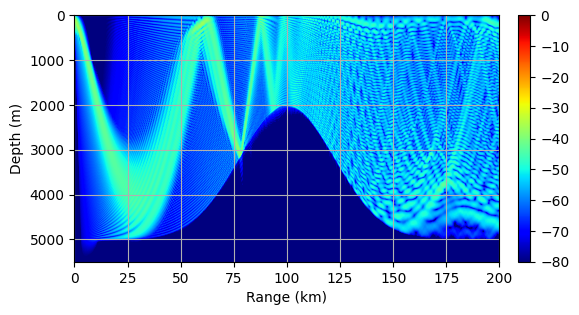

In [17]:
vis = AcousticPressureFieldVisualiser2d(field=field, env=env)
vis.plot2d(min_val=-80, max_val=0, grid=True, show_terrain=True).show()